In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
parent_dir = os.path.join(os.getcwd(), '..', '..')
if parent_dir not in sys.path: sys.path.append(parent_dir)
from utility.data import get_loader, EmbeddingDataset
from model.gan import Generator, Discriminator
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from datasets import load_from_disk
from model.dnn import DNNClassifier
from sklearn.metrics import accuracy_score


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 10
learning_rate = 0.001
batch_size = 512
latent_dim = 128          
condition_dim = 10        
gan_epochs = 150            
generation_size = 1000

full_dataset = load_from_disk('../../data/full_dataset_new', keep_in_memory=True)
split_datasets = full_dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split_datasets['train']
test_dataset = split_datasets['test']


train_x_full = np.array(train_dataset['embedding'])
train_y_full = np.array(train_dataset['labels'])


In [ ]:

def train_and_evaluate_dnn(model, train_loader, test_loader, num_epochs, lr, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, num_epochs+1):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * batch_y.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == batch_y).sum().item()
            total += batch_y.size(0)
        train_loss = running_loss / total
        train_acc = correct / total
        print(f"Epoch {epoch}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}")
    # Evaluate
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
    test_acc = accuracy_score(all_labels, all_preds)
    return test_acc, all_preds, all_labels


train_ds = EmbeddingDataset(train_dataset)
test_ds = EmbeddingDataset(test_dataset)



[Real Data Only] Training size: 20


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)


Training DNN on real data...


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)


Epoch 1: Train Loss=1.1846, Train Acc=0.2000
Epoch 2: Train Loss=0.6889, Train Acc=0.8000
Epoch 3: Train Loss=0.4228, Train Acc=0.9000
Epoch 4: Train Loss=0.3475, Train Acc=0.9000
Epoch 5: Train Loss=0.2187, Train Acc=0.9500
Epoch 6: Train Loss=0.2163, Train Acc=0.9000
Epoch 7: Train Loss=0.2360, Train Acc=0.9000
Epoch 8: Train Loss=0.1576, Train Acc=0.9500
Epoch 9: Train Loss=0.0900, Train Acc=0.9500
Epoch 10: Train Loss=0.1418, Train Acc=0.9500
DNN Test Accuracy (Real Data) for sample size 20: 0.8567


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
C:\Users\ss348\AppData\Local\Temp\ipykernel_36088\900496475.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long).to(device)


[GAN Epoch 1/150] D loss: 0.6878, G loss: 0.7275
[GAN Epoch 2/150] D loss: 0.6234, G loss: 0.7286
[GAN Epoch 3/150] D loss: 0.5666, G loss: 0.7318
[GAN Epoch 4/150] D loss: 0.5127, G loss: 0.7348
[GAN Epoch 5/150] D loss: 0.4656, G loss: 0.7320
[GAN Epoch 6/150] D loss: 0.4254, G loss: 0.7326
[GAN Epoch 7/150] D loss: 0.3972, G loss: 0.7323
[GAN Epoch 8/150] D loss: 0.3737, G loss: 0.7486
[GAN Epoch 9/150] D loss: 0.3494, G loss: 0.7917
[GAN Epoch 10/150] D loss: 0.3242, G loss: 0.8606
[GAN Epoch 11/150] D loss: 0.3058, G loss: 0.9455
[GAN Epoch 12/150] D loss: 0.2992, G loss: 0.9914
[GAN Epoch 13/150] D loss: 0.2966, G loss: 0.9803
[GAN Epoch 14/150] D loss: 0.3118, G loss: 0.9586
[GAN Epoch 15/150] D loss: 0.3275, G loss: 0.9472
[GAN Epoch 16/150] D loss: 0.3379, G loss: 0.9032
[GAN Epoch 17/150] D loss: 0.3110, G loss: 1.0349
[GAN Epoch 18/150] D loss: 0.2872, G loss: 0.9690
[GAN Epoch 19/150] D loss: 0.2456, G loss: 1.4021
[GAN Epoch 20/150] D loss: 0.2588, G loss: 0.9828
[GAN Epoc

c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)


Epoch 5: Train Loss=0.3756, Train Acc=0.8800
Epoch 6: Train Loss=0.3218, Train Acc=0.9000
Epoch 7: Train Loss=0.2684, Train Acc=0.9400
Epoch 8: Train Loss=0.2860, Train Acc=0.9200
Epoch 9: Train Loss=0.2718, Train Acc=0.9000
Epoch 10: Train Loss=0.1996, Train Acc=0.9000
DNN Test Accuracy (Real Data) for sample size 50: 0.8720


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
C:\Users\ss348\AppData\Local\Temp\ipykernel_36088\900496475.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long).to(device)


[GAN Epoch 1/150] D loss: 0.6885, G loss: 0.6932
[GAN Epoch 2/150] D loss: 0.6303, G loss: 0.6914
[GAN Epoch 3/150] D loss: 0.5793, G loss: 0.6921
[GAN Epoch 4/150] D loss: 0.5302, G loss: 0.6926
[GAN Epoch 5/150] D loss: 0.4845, G loss: 0.6924
[GAN Epoch 6/150] D loss: 0.4448, G loss: 0.6947
[GAN Epoch 7/150] D loss: 0.4149, G loss: 0.6983
[GAN Epoch 8/150] D loss: 0.3889, G loss: 0.7180
[GAN Epoch 9/150] D loss: 0.3624, G loss: 0.7615
[GAN Epoch 10/150] D loss: 0.3386, G loss: 0.8229
[GAN Epoch 11/150] D loss: 0.3197, G loss: 0.8955
[GAN Epoch 12/150] D loss: 0.3140, G loss: 0.9354
[GAN Epoch 13/150] D loss: 0.3196, G loss: 0.9241
[GAN Epoch 14/150] D loss: 0.3356, G loss: 0.9065
[GAN Epoch 15/150] D loss: 0.3495, G loss: 0.8931
[GAN Epoch 16/150] D loss: 0.3546, G loss: 0.8697
[GAN Epoch 17/150] D loss: 0.3294, G loss: 0.9830
[GAN Epoch 18/150] D loss: 0.3010, G loss: 0.9396
[GAN Epoch 19/150] D loss: 0.2650, G loss: 1.3450
[GAN Epoch 20/150] D loss: 0.3086, G loss: 0.8366
[GAN Epoc

c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)


Epoch 4: Train Loss=0.3903, Train Acc=0.8714
Epoch 5: Train Loss=0.3933, Train Acc=0.8857
Epoch 6: Train Loss=0.3624, Train Acc=0.8714
Epoch 7: Train Loss=0.2771, Train Acc=0.8857
Epoch 8: Train Loss=0.3017, Train Acc=0.8857
Epoch 9: Train Loss=0.2941, Train Acc=0.8857
Epoch 10: Train Loss=0.2921, Train Acc=0.9000
DNN Test Accuracy (Real Data) for sample size 70: 0.8831
[GAN Epoch 1/150] D loss: 0.6880, G loss: 0.6666


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
C:\Users\ss348\AppData\Local\Temp\ipykernel_36088\900496475.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long).to(device)


[GAN Epoch 2/150] D loss: 0.6292, G loss: 0.6670
[GAN Epoch 3/150] D loss: 0.5775, G loss: 0.6692
[GAN Epoch 4/150] D loss: 0.5283, G loss: 0.6705
[GAN Epoch 5/150] D loss: 0.4818, G loss: 0.6725
[GAN Epoch 6/150] D loss: 0.4441, G loss: 0.6728
[GAN Epoch 7/150] D loss: 0.4160, G loss: 0.6777
[GAN Epoch 8/150] D loss: 0.3949, G loss: 0.6923
[GAN Epoch 9/150] D loss: 0.3723, G loss: 0.7314
[GAN Epoch 10/150] D loss: 0.3497, G loss: 0.7922
[GAN Epoch 11/150] D loss: 0.3297, G loss: 0.8699
[GAN Epoch 12/150] D loss: 0.3173, G loss: 0.9157
[GAN Epoch 13/150] D loss: 0.3147, G loss: 0.9188
[GAN Epoch 14/150] D loss: 0.3225, G loss: 0.9281
[GAN Epoch 15/150] D loss: 0.3364, G loss: 0.9049
[GAN Epoch 16/150] D loss: 0.3482, G loss: 0.8772
[GAN Epoch 17/150] D loss: 0.3378, G loss: 0.9298
[GAN Epoch 18/150] D loss: 0.3080, G loss: 0.9399
[GAN Epoch 19/150] D loss: 0.2704, G loss: 1.1706
[GAN Epoch 20/150] D loss: 0.2591, G loss: 1.0171
[GAN Epoch 21/150] D loss: 0.2058, G loss: 1.3904
[GAN Epo

c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
C:\Users\ss348\AppData\Local\Temp\ipykernel_36088\900496475.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sour

[GAN Epoch 2/150] D loss: 0.6364, G loss: 0.6660
[GAN Epoch 3/150] D loss: 0.5870, G loss: 0.6670
[GAN Epoch 4/150] D loss: 0.5402, G loss: 0.6674
[GAN Epoch 5/150] D loss: 0.4970, G loss: 0.6668
[GAN Epoch 6/150] D loss: 0.4599, G loss: 0.6667
[GAN Epoch 7/150] D loss: 0.4305, G loss: 0.6712
[GAN Epoch 8/150] D loss: 0.4043, G loss: 0.6911
[GAN Epoch 9/150] D loss: 0.3780, G loss: 0.7323
[GAN Epoch 10/150] D loss: 0.3511, G loss: 0.7972
[GAN Epoch 11/150] D loss: 0.3285, G loss: 0.8774
[GAN Epoch 12/150] D loss: 0.3138, G loss: 0.9440
[GAN Epoch 13/150] D loss: 0.3095, G loss: 0.9583
[GAN Epoch 14/150] D loss: 0.3238, G loss: 0.9350
[GAN Epoch 15/150] D loss: 0.3459, G loss: 0.9372
[GAN Epoch 16/150] D loss: 0.3705, G loss: 0.8391
[GAN Epoch 17/150] D loss: 0.3708, G loss: 0.9577
[GAN Epoch 18/150] D loss: 0.3644, G loss: 0.7847
[GAN Epoch 19/150] D loss: 0.3144, G loss: 1.1640
[GAN Epoch 20/150] D loss: 0.3022, G loss: 0.9066
[GAN Epoch 21/150] D loss: 0.2421, G loss: 1.1847
[GAN Epo

c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)


DNN Test Accuracy (Real Data) for sample size 300: 0.8902
[GAN Epoch 1/150] D loss: 0.6891, G loss: 0.7074
[GAN Epoch 2/150] D loss: 0.6336, G loss: 0.7060
[GAN Epoch 3/150] D loss: 0.5832, G loss: 0.7056


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
C:\Users\ss348\AppData\Local\Temp\ipykernel_36088\900496475.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long).to(device)


[GAN Epoch 4/150] D loss: 0.5350, G loss: 0.7034
[GAN Epoch 5/150] D loss: 0.4895, G loss: 0.6989
[GAN Epoch 6/150] D loss: 0.4507, G loss: 0.6940
[GAN Epoch 7/150] D loss: 0.4209, G loss: 0.6934
[GAN Epoch 8/150] D loss: 0.3961, G loss: 0.7087
[GAN Epoch 9/150] D loss: 0.3700, G loss: 0.7507
[GAN Epoch 10/150] D loss: 0.3421, G loss: 0.8220
[GAN Epoch 11/150] D loss: 0.3183, G loss: 0.9074
[GAN Epoch 12/150] D loss: 0.3031, G loss: 0.9665
[GAN Epoch 13/150] D loss: 0.3023, G loss: 0.9672
[GAN Epoch 14/150] D loss: 0.3169, G loss: 0.9587
[GAN Epoch 15/150] D loss: 0.3477, G loss: 0.9005
[GAN Epoch 16/150] D loss: 0.3712, G loss: 0.8503
[GAN Epoch 17/150] D loss: 0.3681, G loss: 0.8561
[GAN Epoch 18/150] D loss: 0.3345, G loss: 0.9208
[GAN Epoch 19/150] D loss: 0.2869, G loss: 1.0481
[GAN Epoch 20/150] D loss: 0.2415, G loss: 1.1477
[GAN Epoch 21/150] D loss: 0.2074, G loss: 1.3112
[GAN Epoch 22/150] D loss: 0.1928, G loss: 1.3243
[GAN Epoch 23/150] D loss: 0.1791, G loss: 1.4664
[GAN E

c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)


Epoch 4: Train Loss=0.2785, Train Acc=0.9120
Epoch 5: Train Loss=0.2724, Train Acc=0.9090
Epoch 6: Train Loss=0.2955, Train Acc=0.9130
Epoch 7: Train Loss=0.2955, Train Acc=0.9100
Epoch 8: Train Loss=0.2745, Train Acc=0.9140
Epoch 9: Train Loss=0.2587, Train Acc=0.9220
Epoch 10: Train Loss=0.2595, Train Acc=0.9140
DNN Test Accuracy (Real Data) for sample size 1000: 0.9029


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
C:\Users\ss348\AppData\Local\Temp\ipykernel_36088\900496475.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long).to(device)


[GAN Epoch 1/150] D loss: 0.6666, G loss: 0.7252
[GAN Epoch 2/150] D loss: 0.5581, G loss: 0.7274
[GAN Epoch 3/150] D loss: 0.4646, G loss: 0.7236
[GAN Epoch 4/150] D loss: 0.4039, G loss: 0.7242
[GAN Epoch 5/150] D loss: 0.3577, G loss: 0.7997
[GAN Epoch 6/150] D loss: 0.3173, G loss: 0.9481
[GAN Epoch 7/150] D loss: 0.3172, G loss: 0.9677
[GAN Epoch 8/150] D loss: 0.3510, G loss: 0.9066
[GAN Epoch 9/150] D loss: 0.3304, G loss: 0.9568
[GAN Epoch 10/150] D loss: 0.2579, G loss: 1.1614
[GAN Epoch 11/150] D loss: 0.2185, G loss: 1.2492
[GAN Epoch 12/150] D loss: 0.2009, G loss: 1.3522
[GAN Epoch 13/150] D loss: 0.1876, G loss: 1.4434
[GAN Epoch 14/150] D loss: 0.1698, G loss: 1.5769
[GAN Epoch 15/150] D loss: 0.1564, G loss: 1.6785
[GAN Epoch 16/150] D loss: 0.2352, G loss: 1.5117
[GAN Epoch 17/150] D loss: 0.2495, G loss: 1.8892
[GAN Epoch 18/150] D loss: 0.1140, G loss: 2.1918
[GAN Epoch 19/150] D loss: 0.2801, G loss: 1.8951
[GAN Epoch 20/150] D loss: 0.2994, G loss: 1.8025
[GAN Epoc

c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)


Epoch 1: Train Loss=0.3960, Train Acc=0.8619
Epoch 2: Train Loss=0.2794, Train Acc=0.9055
Epoch 3: Train Loss=0.2475, Train Acc=0.9082
Epoch 4: Train Loss=0.2421, Train Acc=0.9126
Epoch 5: Train Loss=0.2349, Train Acc=0.9134
Epoch 6: Train Loss=0.2314, Train Acc=0.9169
Epoch 7: Train Loss=0.2289, Train Acc=0.9159
Epoch 8: Train Loss=0.2265, Train Acc=0.9155
Epoch 9: Train Loss=0.2236, Train Acc=0.9160
Epoch 10: Train Loss=0.2211, Train Acc=0.9170
DNN Test Accuracy (Real Data) for sample size 7872: 0.9131


c:\Users\ss348\Desktop\New folder\GAN_Transformer\SICK\experiment\GAN_generated_data_only\..\..\utility\data.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  emb = torch.tensor(self.embeddings[idx], dtype=torch.float)
C:\Users\ss348\AppData\Local\Temp\ipykernel_36088\900496475.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long).to(device)


[GAN Epoch 1/150] D loss: 0.4442, G loss: 0.7561
[GAN Epoch 2/150] D loss: 0.2377, G loss: 1.3396
[GAN Epoch 3/150] D loss: 0.1607, G loss: 2.1687
[GAN Epoch 4/150] D loss: 0.0782, G loss: 2.8928
[GAN Epoch 5/150] D loss: 0.3400, G loss: 2.5897
[GAN Epoch 6/150] D loss: 0.3516, G loss: 1.8569
[GAN Epoch 7/150] D loss: 0.2369, G loss: 2.3079
[GAN Epoch 8/150] D loss: 0.2548, G loss: 2.5052
[GAN Epoch 9/150] D loss: 0.2412, G loss: 2.6157
[GAN Epoch 10/150] D loss: 0.2738, G loss: 2.5512
[GAN Epoch 11/150] D loss: 0.3680, G loss: 2.3234
[GAN Epoch 12/150] D loss: 0.3871, G loss: 2.0296
[GAN Epoch 13/150] D loss: 0.3571, G loss: 1.9232
[GAN Epoch 14/150] D loss: 0.3846, G loss: 1.8551
[GAN Epoch 15/150] D loss: 0.3900, G loss: 1.8509
[GAN Epoch 16/150] D loss: 0.4155, G loss: 1.8642
[GAN Epoch 17/150] D loss: 0.4085, G loss: 1.8339
[GAN Epoch 18/150] D loss: 0.4416, G loss: 1.8305
[GAN Epoch 19/150] D loss: 0.4010, G loss: 1.9057
[GAN Epoch 20/150] D loss: 0.4251, G loss: 1.6451
[GAN Epoc

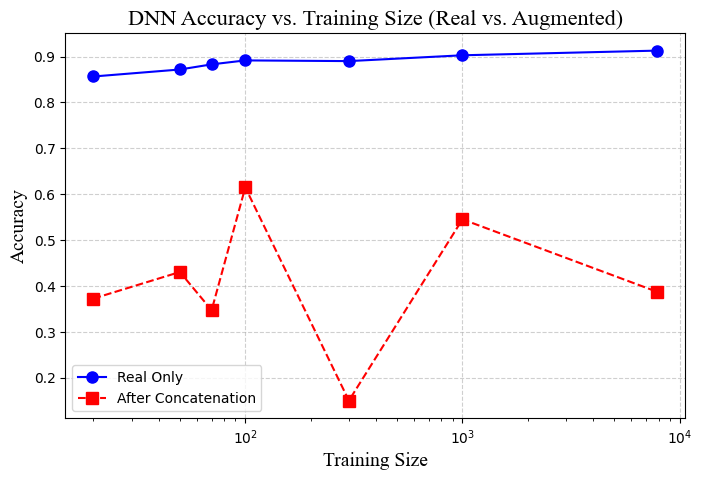

In [8]:
sample_sizes = [20, 50, 70, 100, 300, 1000, len(train_ds)]
dnn_accuracy_before = {}
dnn_accuracy_after = {}

for size in sample_sizes:
    print(f"\n[Real Data Only] Training size: {size}")
    train_subset = torch.utils.data.Subset(train_ds, range(size))
    train_loader = get_loader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = get_loader(test_ds, batch_size=batch_size, shuffle=False)

    input_dim = train_ds[0][0].shape[0]  
    hidden_dim = 128
    num_classes = len(np.unique(train_y_full)) if 'train_y_full' in globals() else 3
    dnn_model = DNNClassifier(input_dim=input_dim, hidden_dim=hidden_dim, num_classes=num_classes, dropout=0.5)
    dnn_model.to(device)
    
    print("Training DNN on real data...")
    acc_before, preds_before, labels_before = train_and_evaluate_dnn(dnn_model, train_loader, test_loader, num_epochs, learning_rate, device)
    print(f"DNN Test Accuracy (Real Data) for sample size {size}: {acc_before:.4f}")
    dnn_accuracy_before[size] = acc_before
    

    generator = Generator(
        latent_dim=latent_dim,
        condition_dim=condition_dim,
        num_classes=num_classes,
        start_dim=latent_dim * 2,
        n_layer=3,
        output_dim=input_dim  
    )
    discriminator = Discriminator(
        condition_dim=condition_dim,
        num_classes=num_classes,
        start_dim=256,
        n_layer=3,
        input_dim=input_dim
    )
    generator.to(device)
    discriminator.to(device)
    adversarial_loss = nn.BCELoss().to(device)


    optimizer_G = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=2e-4, betas=(0.5, 0.999))
    
    gan_loader = get_loader(train_subset, batch_size=batch_size, shuffle=True)
    for epoch in range(gan_epochs):
        d_loss_epoch, g_loss_epoch = 0.0, 0.0
        for embeddings, labels in gan_loader:
            embeddings = embeddings.to(device)
            labels = torch.tensor(labels, dtype=torch.long).to(device)
            b_size = embeddings.size(0)
            valid = torch.ones(b_size, 1, device=device)
            fake = torch.zeros(b_size, 1, device=device)
            # -----------------
            # Train Generator
            # -----------------
            optimizer_G.zero_grad()
            z = torch.randn(b_size, latent_dim, device=device)
            gen_data = generator(z, labels)
            g_loss = adversarial_loss(discriminator(gen_data, labels), valid)
            g_loss.backward()
            optimizer_G.step()
            # -----------------
            # Train Discriminator
            # -----------------
            optimizer_D.zero_grad()
            real_loss = adversarial_loss(discriminator(embeddings, labels), valid)
            fake_loss = adversarial_loss(discriminator(gen_data.detach(), labels), fake)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()
            d_loss_epoch += d_loss.item()
            g_loss_epoch += g_loss.item()
        print(f"[GAN Epoch {epoch+1}/{gan_epochs}] D loss: {d_loss_epoch/len(gan_loader):.4f}, G loss: {g_loss_epoch/len(gan_loader):.4f}")
    

    synthetic_data_list = []
    synthetic_labels_list = []
    unique_labels = np.unique(train_y_full) if 'train_y_full' in globals() else [0,1,2]
    for lab in unique_labels:
        lab_tensor = torch.full((generation_size,), lab, dtype=torch.long, device=device)
        z = torch.randn(generation_size, latent_dim, device=device)
        synth = generator(z, lab_tensor).cpu().detach().numpy()
        synthetic_data_list.append(synth)
        synthetic_labels_list.append(np.full((generation_size,), lab))
    synthetic_x = np.concatenate(synthetic_data_list, axis=0)
    synthetic_y = np.concatenate(synthetic_labels_list, axis=0)
    
    
    train_combined_dataset = TensorDataset(torch.tensor(synthetic_x, dtype=torch.float),
                                             torch.tensor(synthetic_y, dtype=torch.long))
    train_combined_loader = DataLoader(train_combined_dataset, batch_size=batch_size, shuffle=True)

    dnn_model_aug = DNNClassifier(input_dim=input_dim, hidden_dim=hidden_dim, num_classes=num_classes, dropout=0.5)
    dnn_model_aug.to(device)
    
    print("Training DNN on real + synthetic (concatenated) data...")
    acc_after, preds_after, labels_after = train_and_evaluate_dnn(dnn_model_aug, train_combined_loader, test_loader, num_epochs, learning_rate, device)
    print(f"DNN Test Accuracy (After Concatenation) for sample size {size}: {acc_after:.4f}")
    dnn_accuracy_after[size] = acc_after

summary_df = pd.DataFrame(
    [[s, dnn_accuracy_before[s], dnn_accuracy_after[s]] for s in sample_sizes],
    columns=["Train Samples", "Real Only Accuracy", "After Concatenation Accuracy"]
)
print("Accuracy Summary:")
print(tabulate.tabulate(summary_df.values, headers=summary_df.columns, tablefmt="fancy_grid"))

plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, list(dnn_accuracy_before.values()), marker='o', linestyle='-', color='b', markersize=8, label="Real Only")
plt.plot(sample_sizes, list(dnn_accuracy_after.values()), marker='s', linestyle='--', color='r', markersize=8, label="After Concatenation")
plt.xlabel("Training Size", fontsize=14, fontfamily="Times New Roman")
plt.ylabel("Accuracy", fontsize=14, fontfamily="Times New Roman")
plt.title("DNN Accuracy vs. Training Size (Real vs. Augmented)", fontsize=16, fontfamily="Times New Roman")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()
